In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
# from keras.layers import Input, concatenate, Conv2DTranspose, Conv2D, MaxPooling2D, Dropout
from keras import regularizers
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
# import imageio

# import cv2
# %matplotlib inline
# from google.colab.patches import cv2_imshow
# import cv2 as cv
#Replace cv2.imshow() to cv2_imshow()
# import numpy as np




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_model(model_name):
  model_path = f"{working_directory}/{model_name}"
  model = tf.keras.models.load_model(model_path)
  return model

In [ ]:
working_directory = '/content/drive/MyDrive/DLproject'
h = 512
w = 512
model_name = "512_512_34596311"
mod = load_model(model_name)
mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 32)         0         ['conv2d_1[0][0]']            
                                                                                              

In [ ]:
local_images = f'{working_directory}/Localtestset/'
image = img.imread(f'{local_images}{1}.jpg')
image = tf.image.resize(image,(h,w),method='nearest')
print(image.shape)

(512, 512, 3)


In [ ]:
def process_local_path(image_path):
    org_image = tf.io.read_file(image_path)
    org_image = tf.image.decode_png(org_image,channels=3)
    org_image = tf.image.convert_image_dtype(org_image,tf.float32)

    # masked_image = tf.io.read_file(mask_path)
    # masked_image = tf.image.decode_png(masked_image,channels=3)
    # masked_image = tf.math.reduce_max(masked_image,axis=-1,keepdims=True)
    return org_image

def resize_local_image(org_image) :
    org_image = tf.image.resize(org_image,(h,w),method='nearest')
    # masked_image = tf.image.resize(masked_image,(final_h,final_w),method='nearest')

    return org_image

In [ ]:
local_images_list = os.listdir(local_images)
test_local_image_list = sorted([local_images+i for i in local_images_list])
print(test_local_image_list)
test_local_images = tf.constant(test_local_image_list)
print(test_local_images)
test_dataset = tf.data.Dataset.from_tensor_slices(test_local_images)
for image in test_dataset.take(4) :
    print(image)
#     print(mask)




['/content/drive/MyDrive/DLproject/Localtestset/1.jpg', '/content/drive/MyDrive/DLproject/Localtestset/2.jpg', '/content/drive/MyDrive/DLproject/Localtestset/3.jpg', '/content/drive/MyDrive/DLproject/Localtestset/4.jpg', '/content/drive/MyDrive/DLproject/Localtestset/5.jpg']
tf.Tensor(
[b'/content/drive/MyDrive/DLproject/Localtestset/1.jpg'
 b'/content/drive/MyDrive/DLproject/Localtestset/2.jpg'
 b'/content/drive/MyDrive/DLproject/Localtestset/3.jpg'
 b'/content/drive/MyDrive/DLproject/Localtestset/4.jpg'
 b'/content/drive/MyDrive/DLproject/Localtestset/5.jpg'], shape=(5,), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/DLproject/Localtestset/1.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/DLproject/Localtestset/2.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/DLproject/Localtestset/3.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/DLproject/Localtestset/4.jpg', shape=(), dtype=string)


In [ ]:
test_local_image_data = test_dataset.map(process_local_path)
print(test_local_image_data)
final_test_local_image_data = test_local_image_data.map(resize_local_image)
print(final_test_local_image_data)

<_MapDataset element_spec=TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None)>
<_MapDataset element_spec=TensorSpec(shape=(512, 512, 3), dtype=tf.float32, name=None)>


In [ ]:
batch_size = 1
buffer = 3
final_test_local_image_data.batch(batch_size)
final_test_local_dataset = final_test_local_image_data.cache().shuffle(buffer).batch(batch_size)
print(final_test_local_dataset.element_spec)

TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None)


In [ ]:
def display_local(display_list):
    plt.figure(figsize=(5,5))

    title = ['Input Image', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def create_local_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_local_predictions(model,dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image in dataset.take(num):
            # plt.imshow(image[0])
            # print(image.shape)
            # plt.show()
            pred_mask = model.predict(image)
            # plt.imshow(create_mask(pred_mask))
            display_local([image[0], create_local_mask(pred_mask)])
    # else:
    #     display([sample_image, sample_mask,
    #          create_mask(Unet_model.predict(sample_image[tf.newaxis, ...]))])

test_dataset results:

1/1 [==============================] - 4s 4s/step


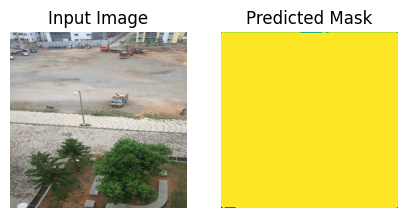

1/1 [==============================] - 2s 2s/step


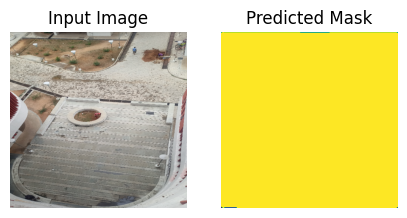

1/1 [==============================] - 2s 2s/step


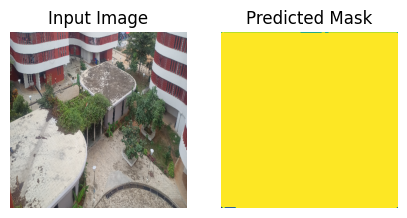

1/1 [==============================] - 2s 2s/step


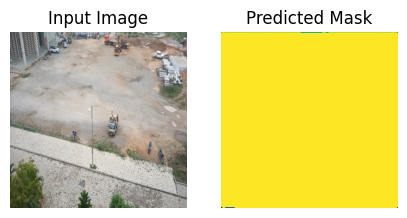

1/1 [==============================] - 3s 3s/step


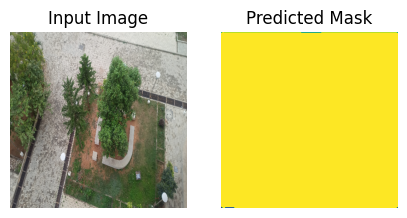

In [ ]:
print("test_dataset results:\n")
show_local_predictions(mod,final_test_local_dataset, 5)